In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [44]:
df = pd.read_csv('/MTA_Subway_Hourly_Ridership__2020-2024_20250504.csv')

In [45]:
df.shape

(6042852, 12)

# To-do
- check column types
- check missing values
- remove irrelevant columns


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042852 entries, 0 to 6042851
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 553.2+ MB


In [47]:
df.head(5)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,03/04/2024 12:00:00 AM,subway,80,"121 St (J,Z)",Queens,omny,OMNY - Full Fare,2,1,40.700493,-73.82829,POINT (-73.82829 40.700493)
1,03/04/2024 12:00:00 AM,subway,16,"8 St-NYU (R,W)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,5,0,40.730328,-73.99263,POINT (-73.99263 40.730328)
2,03/04/2024 12:00:00 AM,subway,47,"Newkirk Plaza (B,Q)",Brooklyn,metrocard,Metrocard - Unlimited 7-Day,1,0,40.635082,-73.96279,POINT (-73.96279 40.635082)
3,03/04/2024 12:00:00 AM,subway,392,"125 St (4,5,6)",Manhattan,metrocard,Metrocard - Fair Fare,11,0,40.804140,-73.93759,POINT (-73.93759 40.80414)
4,03/04/2024 12:00:00 AM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Unlimited 7-Day,3,0,40.757340,-73.95412,POINT (-73.95412 40.75734)


In [48]:
df.drop(axis=1,columns=["latitude","longitude","Georeference","transfers","payment_method","fare_class_category"],inplace=True)

In [49]:
df.isna().sum()

,0
transit_timestamp,0
transit_mode,0
station_complex_id,0
station_complex,0
borough,0
ridership,0


In [50]:
df["transit_timestamp"] = pd.to_datetime(df["transit_timestamp"])
df['hour'] = df['transit_timestamp'].dt.hour

<ipython-input-50-3254dd45de0b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["transit_timestamp"] = pd.to_datetime(df["transit_timestamp"])


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042852 entries, 0 to 6042851
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   transit_timestamp   datetime64[ns]
 1   transit_mode        object        
 2   station_complex_id  object        
 3   station_complex     object        
 4   borough             object        
 5   ridership           int64         
 6   hour                int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 299.7+ MB


In [52]:
df.head(5)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,ridership,hour
0,2024-03-04,subway,80,"121 St (J,Z)",Queens,2,0
1,2024-03-04,subway,16,"8 St-NYU (R,W)",Manhattan,5,0
2,2024-03-04,subway,47,"Newkirk Plaza (B,Q)",Brooklyn,1,0
3,2024-03-04,subway,392,"125 St (4,5,6)",Manhattan,11,0
4,2024-03-04,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,3,0


In [53]:
df = df[df["transit_mode"]=="subway"]

In [54]:
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,ridership,hour
0,2024-03-04 00:00:00,subway,80,"121 St (J,Z)",Queens,2,0
1,2024-03-04 00:00:00,subway,16,"8 St-NYU (R,W)",Manhattan,5,0
2,2024-03-04 00:00:00,subway,47,"Newkirk Plaza (B,Q)",Brooklyn,1,0
3,2024-03-04 00:00:00,subway,392,"125 St (4,5,6)",Manhattan,11,0
5,2024-03-04 00:00:00,subway,606,"Court Sq (E,G,M,7)",Queens,3,0
...,...,...,...,...,...,...,...
6042835,2024-05-26 23:00:00,subway,51,"Kings Hwy (B,Q)",Brooklyn,8,23
6042836,2024-05-26 23:00:00,subway,441,"Central Park North (110 St) (2,3)",Manhattan,9,23
6042837,2024-05-26 23:00:00,subway,391,"138 St-Grand Concourse (4,5)",Bronx,1,23
6042838,2024-05-26 23:00:00,subway,262,"67 Av (M,R)",Queens,17,23


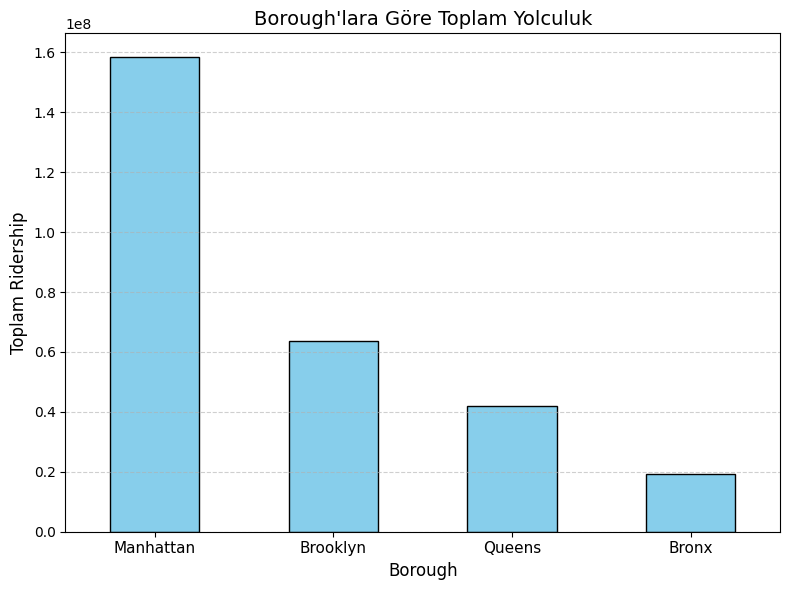

In [55]:
borough_totals = df.groupby("borough")["ridership"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
borough_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Borough'lara Göre Toplam Yolculuk", fontsize=14)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Toplam Ridership", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# We will focus on Manhattan.

In [56]:
df = df[df["borough"]=="Manhattan"]

In [57]:
df.groupby("station_complex")["ridership"].sum().sort_values(ascending=False)

,ridership
station_complex,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",10807170
"Grand Central-42 St (S,4,5,6,7)",7884287
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",5801900
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",5366653
"Fulton St (A,C,J,Z,2,3,4,5)",4528616
...,...
Harlem-148 St (3),160010
145 St (3),141745
215 St (1),138156


In [58]:
def clean_station_name(name):
    return name.split("/")[0].split("(")[0].strip()  # Kısa yol: hem "/" hem parantezleri sil

# Temiz sütunu ayrı tut
df.loc[:, "clean_station"] = df["station_complex"].apply(clean_station_name)

<ipython-input-58-ca3458a3af14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clean_station"] = df["station_complex"].apply(clean_station_name)


In [59]:
df.groupby("clean_station")["ridership"].sum().sort_values(ascending=False)

,ridership
clean_station,
Times Sq-42 St,10807170
34 St-Penn Station,8130840
Grand Central-42 St,7884287
34 St-Herald Sq,5801900
23 St,5719881
...,...
190 St,236283
Bowery,218357
163 St-Amsterdam Av,207843


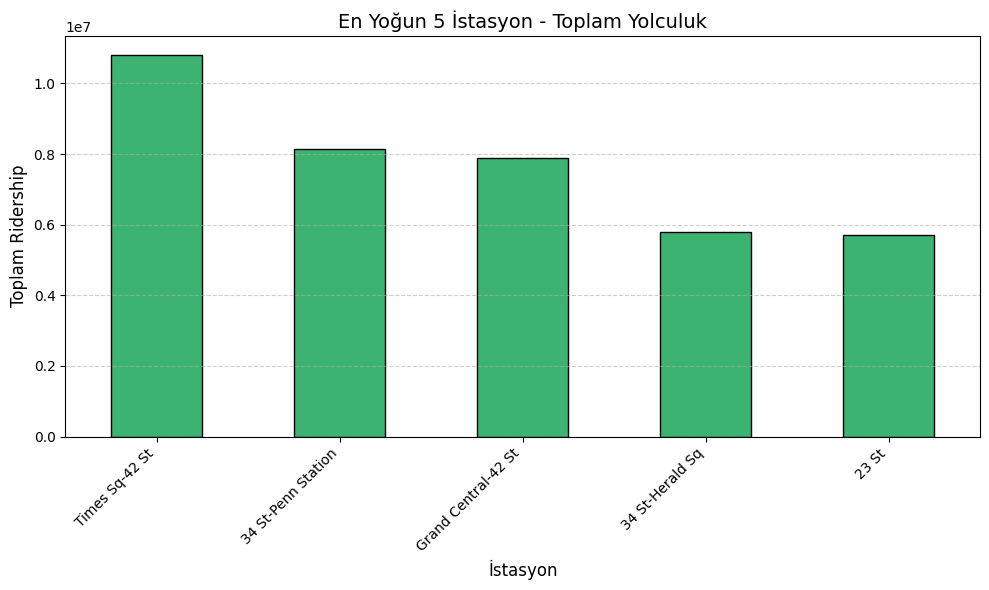

In [60]:
top5_stations = df.groupby("clean_station")["ridership"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
top5_stations.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("En Yoğun 5 İstasyon - Toplam Yolculuk", fontsize=14)
plt.xlabel("İstasyon", fontsize=12)
plt.ylabel("Toplam Ridership", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

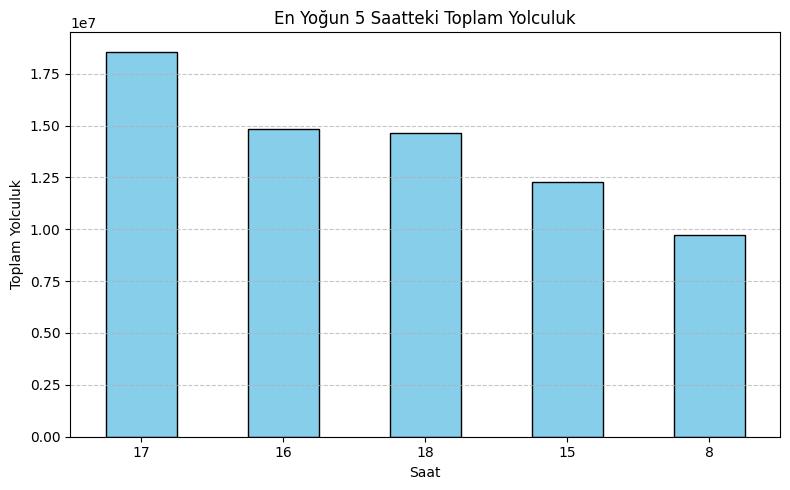

In [61]:
top5_hours = df.groupby("hour")["ridership"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top5_hours.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("En Yoğun 5 Saatteki Toplam Yolculuk")
plt.xlabel("Saat")
plt.ylabel("Toplam Yolculuk")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()